<a href="https://colab.research.google.com/github/ludutram/LucianaDutra/blob/master/Policy_Evaluation___FrozenLake_Livro_RL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import numpy as np
import gym

Ciclo principal que faz uma etapa de avaliação de políticas e uma tapa de melhoria de políticas. Este ciclo termina quando a política fica estável.

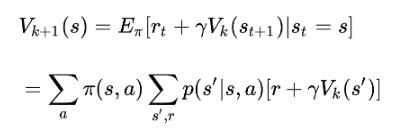

In [62]:
#antes de definir a policy_evaluation, podemos criar uma função para avaliar o 
#valor da ação esperado que será aproveitado no policy_improvement
def eval_state_action(V, s, a, gamma=0.99):        #gamma=0.99 fator de desconto, quanto maior, mais difícil prever o valor de estado porque ele deve olhar mais para o futuro
  return  np.sum([p * (rew + gamma*V[next_s]) for p, next_s, rew, _ in env.P[s][a]])  # P é um dicionário que contém todas as informaçãoes sobre a dinâmica do ambiente

 

In [63]:
#Definir policy_evaluation que calcula a política atual para cada estado até a atingir valores estáveis. Como a política é determinística, avaliamos apenas uma ação:
def policy_evaluation(V, policy, eps=0.0001):
    
    while True:
        delta = 0
        # iteração para todos os estados
        for s in range(nS):
            old_v = V[s]
            # atualiza V[s] usando a equação de Bellman
            V[s] = eval_state_action(V, s, policy[s])
            delta = max(delta, np.abs(old_v - V[s]))   
       #a função valor é estável quando delta é menor que limite de eps = 0.0001 
        if delta < eps:    #função de valor é estável sempre que o delta for menor que o o limite "eps"
            break          #quando essas condições são atendidas, a instrução de loop while é interrompida.
  

In [64]:
#Define Policy improvement. Usa a função de valor e a política e os itera em todos os estados para atualizar a política com base na nova função de valor
def policy_improvement(V, policy):   
    
    policy_stable = True
    for s in range(nS):
        old_a = policy[s]         # atualiza a política com a ação que traz o maior valor de estado
        policy[s] = np.argmax([eval_state_action(V, s, a) for a in range(nA)])
        if old_a != policy[s]: 
            policy_stable = False  #retorna "false" enquanto a política estiver mudando, ou seja, enquanto não é estável.
    return policy_stable
    

In [65]:
#Define a função de execução de muitas partidas para testar a nova política e imprime o número de partidas ganhas: 
def run_episodes(env, policy, num_games=100):  
    tot_rew = 0
    state = env.reset()
    for _ in range(num_games):
        done = False
        while not done: 
            # seleciona a próxima ação de acordo com a política
            next_state, reward, done, _ = env.step(policy[state])
            state = next_state
            tot_rew += reward 
            if done:
                 state = env.reset()
    print('Venceu %i de %i partidas!'%(tot_rew, num_games))

In [67]:
#Cria o ambiente
env = gym.make('FrozenLake-v1')
env = env.unwrapped

In [68]:
#Dimensão do espaço
nA = env.action_space.n
nS = env.observation_space.n
print(nA)
print(nS)

4
16


In [69]:
#Inicializa o valor função e a política
V = np.zeros(nS)
policy = np.zeros(nS)
print(V)
print(policy)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [70]:
 #Variáveis 
 policy_stable = False
 it = 0

 while not policy_stable:
     policy_evaluation(V, policy)
     policy_stable = policy_improvement(V, policy)
     it += 1

In [71]:
#No final imprime o número de iterações completas, o valor da função, a política e  pontuação alcançada
print('Convergiu depois de %i iterações da política '%(it)) 
#run_episodes(env, V, policy)
print(V.reshape((4,4)))
print(policy.reshape((4,4)))

Convergiu depois de 7 iterações da política 
[[0.54091157 0.49730529 0.46893217 0.4549538 ]
 [0.55745963 0.         0.35758788 0.        ]
 [0.59098844 0.64249454 0.61469305 0.        ]
 [0.         0.74131715 0.86263385 0.        ]]
[[0. 3. 3. 3.]
 [0. 0. 0. 0.]
 [3. 1. 0. 0.]
 [0. 2. 1. 0.]]


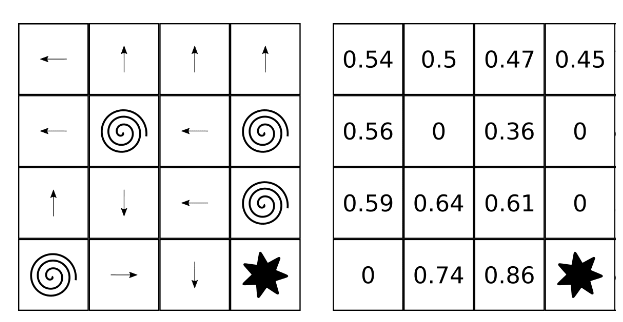